In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


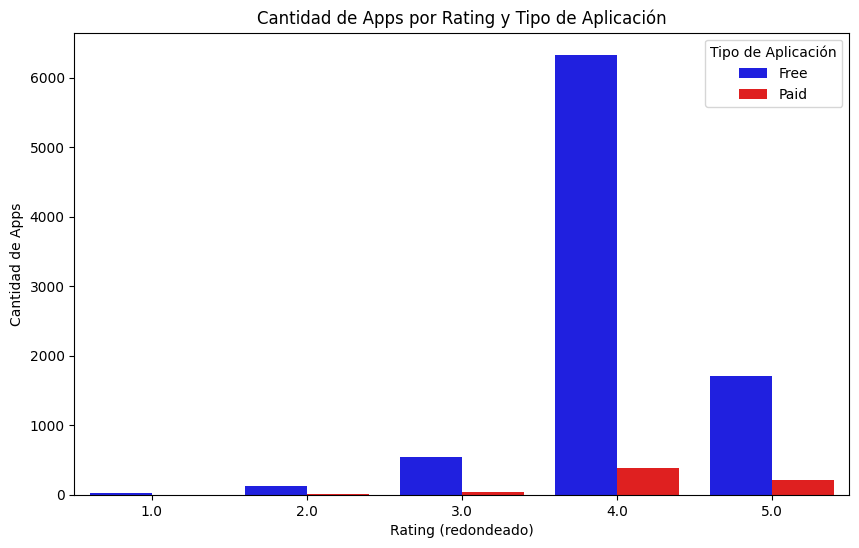

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Organizacion de datos/googleplaystore.csv')
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
# Elimino las filas que contienen NaN en la columna 'Rating'
df = df.dropna(subset=['Rating'])
# Redondeo al entero mas cercano para el plot
df['Rating'] = df['Rating'].round()
# me quedo solo con el año que interesa para el plot
df['Year'] = df['Last Updated'].str.extract(r'(\d{4})')
df_limpio = df[df['Type'].isin(['Free', 'Paid'])]

# Crea un gráfico de barras utilizando Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(x='Rating', hue='Type', data=df_limpio, palette={'Free': 'b', 'Paid': 'r'})
plt.xlabel('Rating (redondeado)')
plt.ylabel('Cantidad de Apps')
plt.title('Cantidad de Apps por Rating y Tipo de Aplicación')
plt.xticks(rotation=0)
plt.legend(title='Tipo de Aplicación')
plt.show()